In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# **EXPLORING THE DATASET**

In [2]:
dataset = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
dataset.shape

(284807, 31)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# **DATA VISUALIZATION**

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt

Define the class labels as 'y'.

In [10]:
y = dataset['Class']
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

'X' is our feature variable.

In [11]:
X = dataset.iloc[:,:-1]
X.shape

(284807, 30)

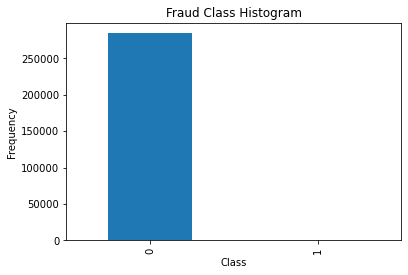

In [12]:
count_classes = pd.value_counts(dataset['Class'], sort=True).sort_index()
count_classes.plot(kind='bar')
plt.title("Fraud Class Histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

Clearly the data is totally unbalanced and is responsible for the decrement in the accuracy of our predictive model.

Lets look at correlation of features. 

This will tell us how the features are correlated with each other. 

Correlation gives us a intution on which variables are important, and have impact on the predicted class.

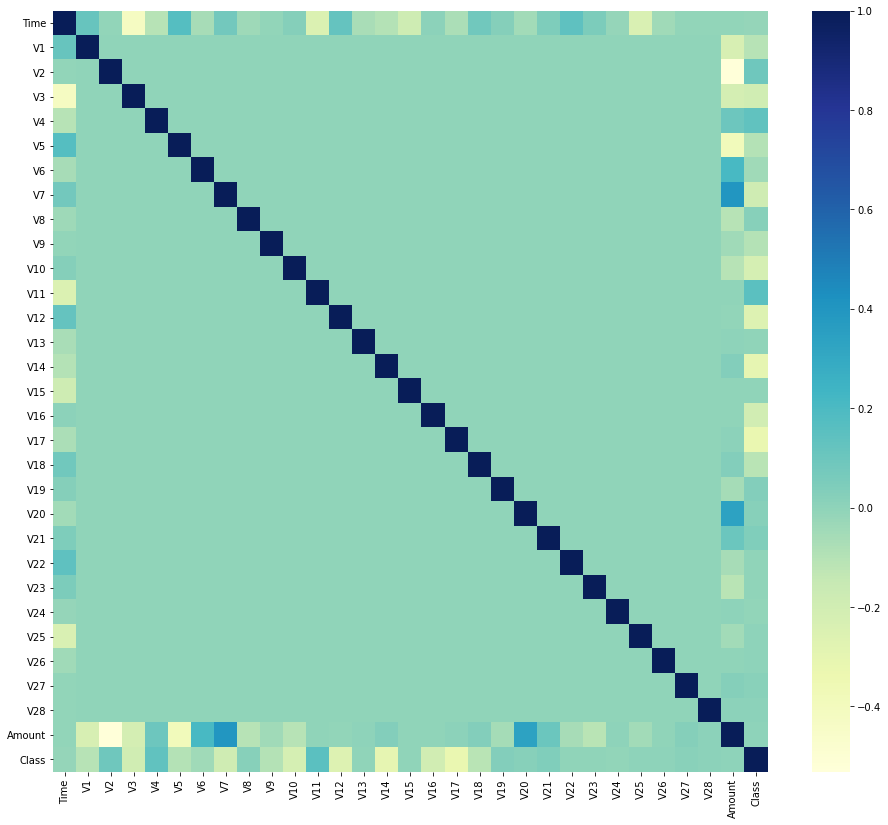

In [13]:
corr_mtx = dataset.corr()
f, ax = plt.subplots(figsize=(16, 14))
ax = sns.heatmap(corr_mtx,annot=False,cmap="YlGnBu")

In [14]:
print(corr_mtx['Class'].sort_values(ascending = False)) 

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


V11, V4 and V2 are the features which have the most correlation impact on Class, and there are attributes which are negatively correlated as well.

Let us now, plot a histogram of all features to see the spread of data. This allows us to get a deeper understanding of the data.

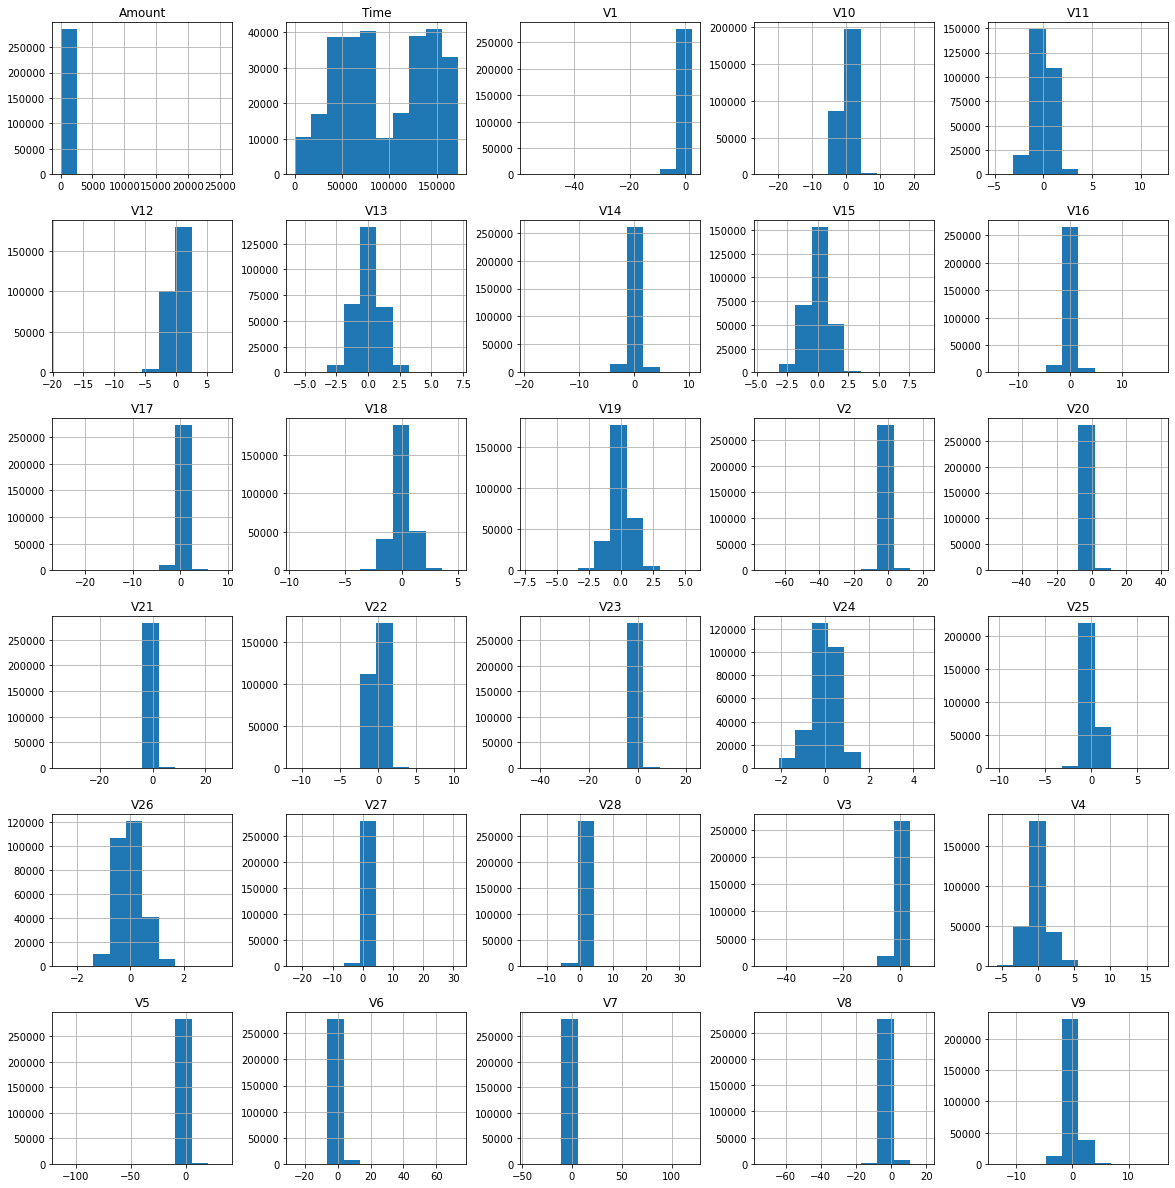

In [15]:
X.hist(figsize=(20,21))
plt.show()

# **KNN CLASSIFICATION**

In [16]:
dataset_new = dataset.drop(columns=['Time', 'V1', 'V2', 'V3','V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18','V20','V22', 'V23','V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],axis=1)

In [17]:
dataset_new.sample(10)

,V4,V11,V19,V21,Class
30399,-0.674974,0.470945,0.056280,0.050235,0
233668,-1.423457,-0.912434,-0.318306,-0.132972,0
200419,-1.039456,0.906229,0.504532,0.436919,0
171434,0.784473,-1.356436,-0.813617,0.197481,0
239771,0.439497,-0.574604,0.076511,0.157600,0
276647,-0.323005,0.963996,0.054884,0.157808,0
112129,2.402313,1.424525,-1.364775,0.232063,0
251564,-0.865980,-1.603186,-0.186830,-0.289325,0
139336,-1.904603,-0.191423,0.927600,-0.064208,0
244977,0.252155,0.503477,0.295624,-0.154783,0


In [18]:
dataset_new["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Let us now, split the dataset into training and testing data.

In [19]:
from sklearn.model_selection import train_test_split 

y = dataset_new.iloc[:,-1]
X = dataset_new.iloc[:,:-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In order to find the number of neighboirs, we plot the **elbow plot**.

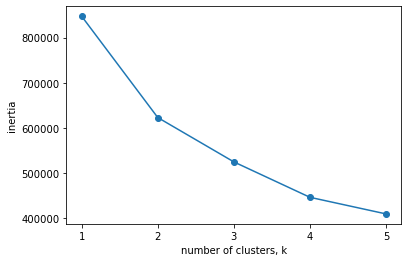

In [20]:
from sklearn.cluster import KMeans

ks = range(1, 6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X_train)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [21]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=4)
k_labels = model.fit(X_train,y_train)

In [22]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [23]:
model.score(X_test,y_test)

0.9990754069964772

**We have obtained the accuracy of 99.90% using KNN Classifier.**

Now, let us try using the Grid Search CV Algorithm.

# **GRID SEARCH CV ALGORITHM**

Steps :
1. Create a new KNN model.
2. Create a dictionary of all values that we want to test for n_neighbors.
3. Use gridsearch to test all values for n_neighbors.
4. Fit the model to data.



In [24]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [25]:
knn_gscv.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

Check the mean score for the top performing value of n_neighbors.


In [26]:
knn_gscv.best_score_

0.9989782552405282

We used GridSearch Cv algorithm and obtained the score of 99.89%.